# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = 'car_purchase.csv'

In [3]:
df = pd.read_csv(file)

In [5]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
dataset = df[['Age','EstimatedSalary','Purchased']]

In [10]:
x_data = df.iloc[:,[2,3]].values
y_data = df.iloc[:,4].values

In [11]:
x_data

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.20,random_state=0)

In [15]:
# Performing Feature Skeling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(x_train,y_train)

c:\python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = clf.predict(x_test)

In [20]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [21]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [22]:
clf.score(x_test,y_test)

0.8875

In [23]:
# Importing confussion matrix to check no of right and wrong prediction
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[52,  6],
       [ 3, 19]], dtype=int64)

In [25]:
# Logistic Regression Visualization Part
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


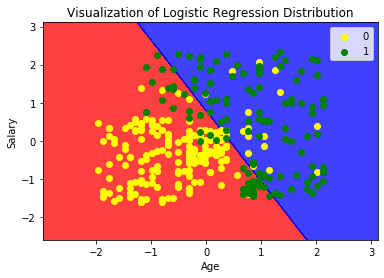

In [28]:
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,step=0.01),
                    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,0].max()+1,step=0.01),
                   )
plt.contourf(x1,x2,clf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('yellow','green'))(i),label=j)
plt.title('Visualization of Logistic Regression Distribution')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [29]:
x_set_test,y_set_test = x_test,y_test

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


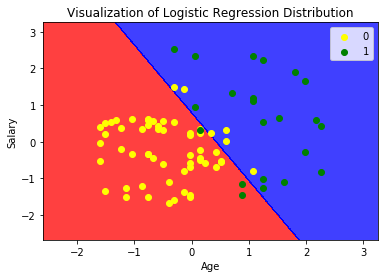

In [30]:
x1_test,x2_test = np.meshgrid(np.arange(start=x_set_test[:,0].min()-1, stop=x_set_test[:,0].max()+1,step=0.01),
                    np.arange(start=x_set_test[:,1].min()-1, stop=x_set_test[:,0].max()+1,step=0.01),
                   )
plt.contourf(x1_test,x2_test,clf.predict(np.array([x1_test.ravel(),x2_test.ravel()]).T).reshape(x1_test.shape),alpha=0.75,cmap=ListedColormap(('red','blue')))
plt.xlim(x1_test.min(),x1_test.max())
plt.ylim(x2_test.min(),x2_test.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set_test[y_set_test==j,0],x_set_test[y_set_test==j,1],
               c=ListedColormap(('yellow','green'))(i),label=j)
plt.title('Visualization of Logistic Regression Distribution')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()